In [84]:
# chi2 test always gives the idea about the two categorical Features are corrlated or not.
# we're not able to get the strength of corr 
# to know the strength - use cramers-v test 

In [5]:
import pandas as pd
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [6]:
#os.listdir(".")

In [7]:
df = pd.read_csv('ChurnDataset.csv',index_col=0)
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


## Chi2 test : 

- **There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:**
    - **A chi-square goodness of fit test determines if sample data matches a population. For more details on this type, see:          Goodness of Fit Test.**
    -**A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more           general sense, it tests to see whether distributions of categorical variables differ from each another.**
    - **Chi2test revolves arroud the variances**( wheather the variances are same or not )
    - **It's a Non_Parametric test (Dosn't have any dataBoundary Restrictions)**

### **CHi2 test of Independant**

- agenda check the categorical Variables(Gender and Churn is dependant or not , is there any significance?)
- h0 = Both Features are Independant 
- h1 = Both Features are dependant(Not  Independent)

In [66]:
# check the unique value in Gender cols
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [67]:
# check the value count 
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

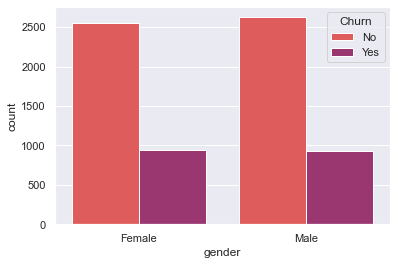

In [68]:
# plot the Counplot for the gender cols & check is there any significance with the Churn col

sns.set(style = "darkgrid")
sns.countplot(x= 'gender' , data=df , hue="Churn" , saturation=1 , palette='flare')

In [69]:
# observation :
# he table contains the observed frequencies(i.e. number of occurrences) in each category are almost same 
# features looks like Independant 

In [70]:
# statistical Analysis 

conti = pd.crosstab(df['gender']  , df['Churn'])
print(conti)

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


In [71]:
conti.iloc[0].values

array([2549,  939], dtype=int64)

In [72]:
conti.iloc[1].values

array([2625,  930], dtype=int64)

In [73]:
# for return details read the documentation 
(chi2 , p , doff , Expected) = stats.chi2_contingency([conti.iloc[0].values ,conti.iloc[1].values ]  )
print("Chi2 Values = " , chi2)
print("P_value = " , p )
print("Degree Of Fredom  = " , doff )
print("Expected values or conut = " , Expected )

Chi2 Values =  0.4840828822091383
P_value =  0.48657873605618596
Degree Of Fredom  =  1
Expected values or conut =  [[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


In [74]:
# here the p Values = 0.48 which is greater than the 0.05 (significance_level) hence we Failed to reject the null hypothesis ,
#                Here we accept the Null Hypothisis ( p > 0.05)

if p < 0.05 :
    print("Reject the Null Hypothesis , (Features are dependant)")
else : 
    print( "Accept the Null Hypothesis(Features are Independant..)")

Accept the Null Hypothesis(Features are Independant..)


**p > 0.05 , Hence we accept the H0 (Features are Independant)**

#### Let's Perform the cji2 test on PaperlessBilling and Churn cols

- agenda check the categorical Variables(Gender and Churn is dependant or not , is there any significance?)
- h0 = Both Features are Independant
- h1 = Both Features are dependant(Not Independent)

In [75]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

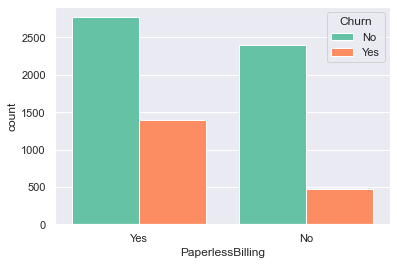

In [77]:
sns.set(style = "darkgrid")
sns.countplot(x= 'PaperlessBilling' , data=df , hue="Churn" , saturation=1 , palette="Set2")

In [78]:
# observation :
# he table contains the observed frequencies(i.e. number of occurrences) in each category are almost different 
# features looks like dependant

In [79]:
# Statistical Analysis 
conti2 = pd.crosstab(df['PaperlessBilling'] , df['Churn'])
print(conti)

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


In [80]:
conti2.iloc[0].values

array([2403,  469], dtype=int64)

In [81]:
conti2.iloc[1].values

array([2771, 1400], dtype=int64)

In [82]:
# for return details read the documentation 
(chi2 , p , doff , Expected) = stats.chi2_contingency([conti2.iloc[0].values ,conti2.iloc[1].values ]  )
print("Chi2 Values = " , chi2)
print("P_value = " , p )
print("Degree Of Fredom  = " , doff )
print("Expected values or conut = " , Expected )

Chi2 Values =  258.27764906707307
P_value =  4.073354668665985e-58
Degree Of Fredom  =  1
Expected values or conut =  [[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]


In [83]:
# here the p Values = 4.073354668665985e-58 which is Lesser than the 0.05 (significance_level) hence we  reject the null hypothesis ,
#                Here we accept the Alternative Hypothisis ( p < 0.05)

if p < 0.05 :
    print("Reject the Null Hypothesis , (Features are dependant)")
else : 
    print( "Accept the Null Hypothesis(Features are Independant..)")

Reject the Null Hypothesis , (Features are dependant)


In [86]:
from IPython.display import Image
Image(url = 'https://www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg' , filename='chi2testFormulae') 

In [87]:
# here : o - Observed Frequency 
# E - Expected Frequency 